<a href="https://colab.research.google.com/github/jcs-lambda/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import seaborn as sns

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [46]:
df_unsup = df.drop('diagnosis', axis=1)
df_unsup.head()

id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
0    842302        17.99  ...                  0.11890          NaN
1    842517        20.57  ...                  0.08902          NaN
2  84300903        19.69  ...                  0.08758          NaN
3  84348301        11.42  ...                  0.17300          NaN
4  84358402        20.29  ...                  0.07678          NaN

[5 rows x 32 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [47]:
print(df_unsup.shape)
df_unsup.isnull().sum()

(569, 32)


id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [48]:
df_unsup = df_unsup.drop('Unnamed: 32', axis=1)
print(df_unsup.isnull().sum().any())
df_unsup.head()

False


id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0    842302        17.99  ...          0.4601                  0.11890
1    842517        20.57  ...          0.2750                  0.08902
2  84300903        19.69  ...          0.3613                  0.08758
3  84348301        11.42  ...          0.6638                  0.17300
4  84358402        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

In [49]:
print(df_unsup.shape)
len(df_unsup['id'].unique())

(569, 31)


569

In [50]:
df_unsup = df_unsup.set_index('id')
print(df_unsup.shape)
df_unsup.head()

(569, 30)


radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
id                                   ...                                         
842302          17.99         10.38  ...          0.4601                  0.11890
842517          20.57         17.77  ...          0.2750                  0.08902
84300903        19.69         21.25  ...          0.3613                  0.08758
84348301        11.42         20.38  ...          0.6638                  0.17300
84358402        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

In [51]:
df_unsup.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [52]:
df_unsup.describe()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]

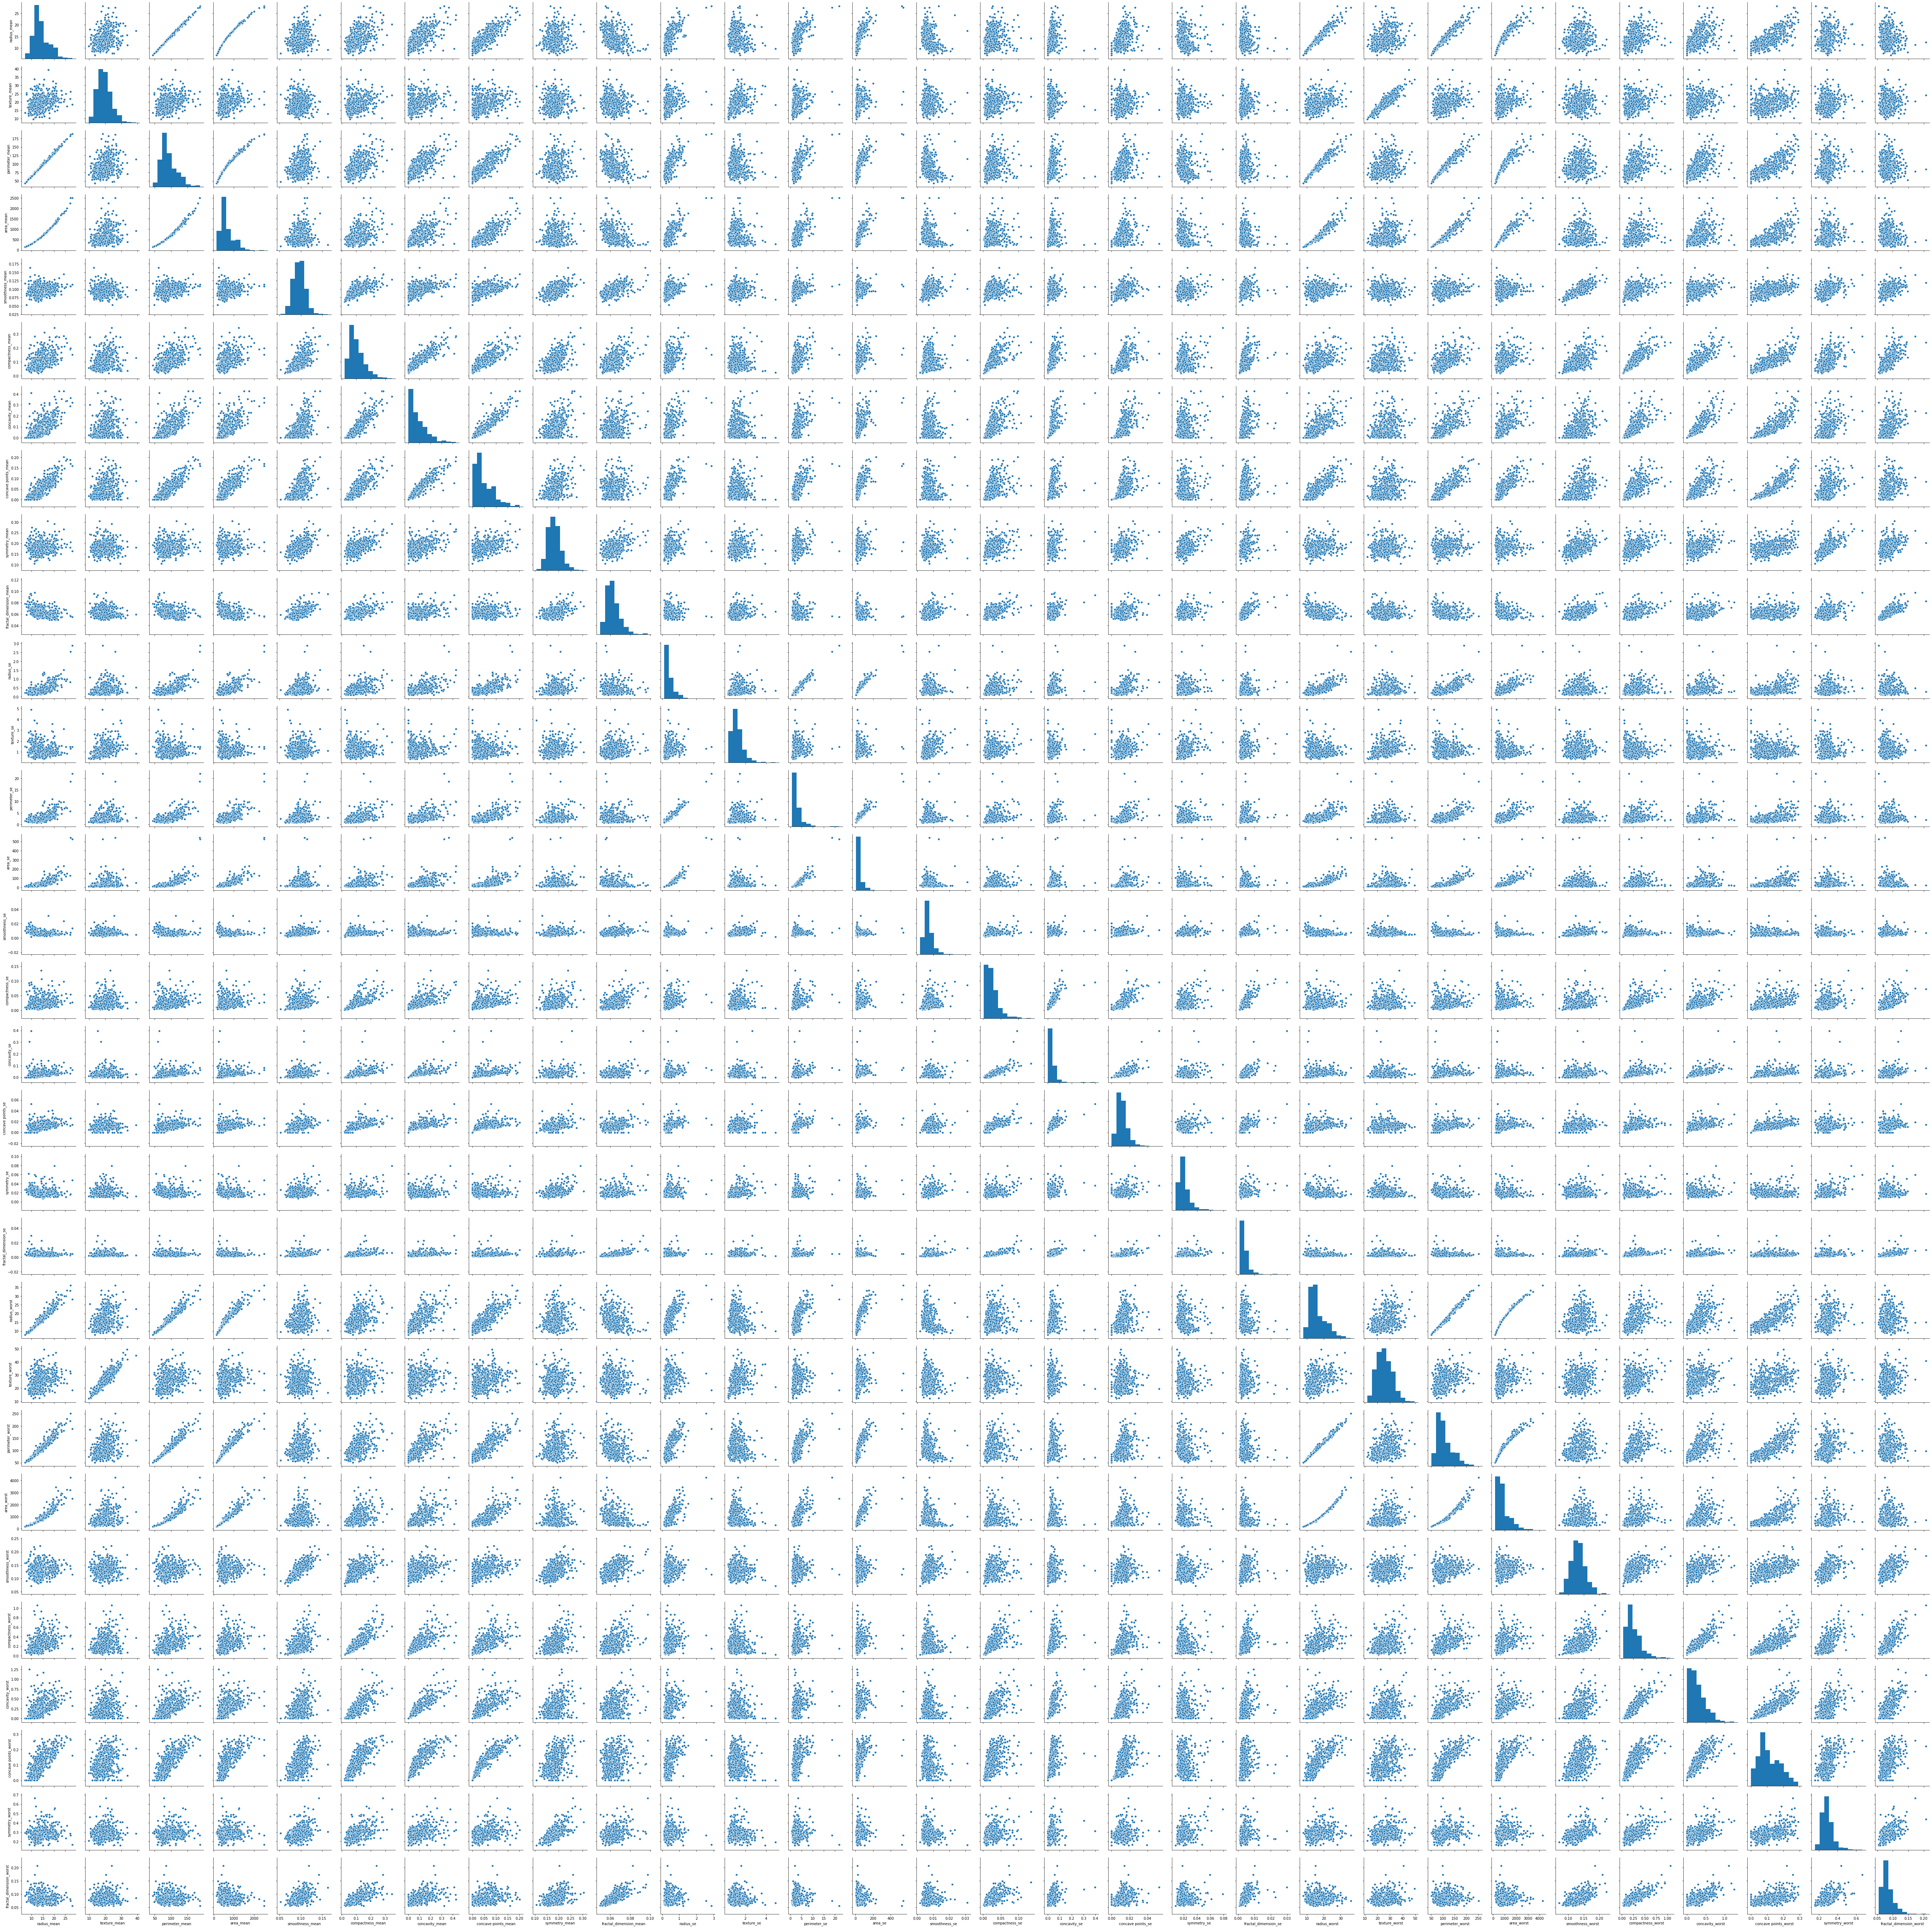

In [14]:
points = df_unsup.drop('id', axis=1)
sns.pairplot(points)

In [62]:
df_unsup.describe().loc['std'].sort_values(ascending=False)

area_worst                 569.356993
area_mean                  351.914129
area_se                     45.491006
perimeter_worst             33.602542
perimeter_mean              24.298981
texture_worst                6.146258
radius_worst                 4.833242
texture_mean                 4.301036
radius_mean                  3.524049
perimeter_se                 2.021855
texture_se                   0.551648
radius_se                    0.277313
concavity_worst              0.208624
compactness_worst            0.157336
concavity_mean               0.079720
concave points_worst         0.065732
symmetry_worst               0.061867
compactness_mean             0.052813
concave points_mean          0.038803
concavity_se                 0.030186
symmetry_mean                0.027414
smoothness_worst             0.022832
fractal_dimension_worst      0.018061
compactness_se               0.017908
smoothness_mean              0.014064
symmetry_se                  0.008266
fractal_dime

In [103]:
columns_with_highest_stddev = df_unsup.describe().loc['std'].sort_values(ascending=False).head(10).index
df_kmeans = df_unsup[columns_with_highest_stddev].copy()
print(df_kmeans.shape)
df_kmeans.head()

(569, 10)


area_worst  area_mean  ...  radius_mean  perimeter_se
id                               ...                           
842302        2019.0     1001.0  ...        17.99         8.589
842517        1956.0     1326.0  ...        20.57         3.398
84300903      1709.0     1203.0  ...        19.69         4.585
84348301       567.7      386.1  ...        11.42         3.445
84358402      1575.0     1297.0  ...        20.29         5.438

[5 rows x 10 columns]

In [0]:
def elbow_plot(df):
  sum_of_squared_distances = []
  K = range(1,15)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)
  plt.plot(K, sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.grid(True)
  plt.show()

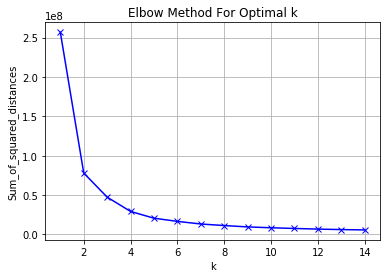

In [87]:
elbow_plot(df_kmeans)

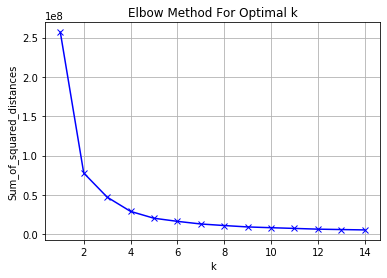

In [88]:
elbow_plot(df_unsup)

In [0]:
#@title Perform K-Means Clustering on the Dataset

# for my minimized set
km = KMeans(2)
km.fit(df_kmeans)
df_kmeans['cluster'] = km.labels_

# for the whole set
km2 = KMeans(2)
km2.fit(df_unsup)
df_unsup['cluster'] = km2.labels_

In [146]:
df_kmeans.head()

area_worst  area_mean  area_se  ...  radius_mean  perimeter_se  cluster
id                                        ...                                    
842302        2019.0     1001.0   153.40  ...        17.99         8.589        1
842517        1956.0     1326.0    74.08  ...        20.57         3.398        1
84300903      1709.0     1203.0    94.03  ...        19.69         4.585        1
84348301       567.7      386.1    27.23  ...        11.42         3.445        0
84358402      1575.0     1297.0    94.44  ...        20.29         5.438        1

[5 rows x 11 columns]

In [147]:
df_unsup.head()

radius_mean  texture_mean  ...  fractal_dimension_worst  cluster
id                                   ...                                  
842302          17.99         10.38  ...                  0.11890        1
842517          20.57         17.77  ...                  0.08902        1
84300903        19.69         21.25  ...                  0.08758        1
84348301        11.42         20.38  ...                  0.17300        0
84358402        20.29         14.34  ...                  0.07678        1

[5 rows x 31 columns]

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [161]:
df2 = df[['id', 'diagnosis']].set_index('id')
df2['diagnosis_code'] = df2['diagnosis'].astype('category').cat.codes
df2['cluster_kmeans_df'] = df_kmeans['cluster']
df2['cluster_unsup_df'] = df_unsup['cluster']
print(df2.shape)
df2.head()

(569, 4)


diagnosis  diagnosis_code  cluster_kmeans_df  cluster_unsup_df
id                                                                     
842302           M               1                  1                 1
842517           M               1                  1                 1
84300903         M               1                  1                 1
84348301         M               1                  0                 0
84358402         M               1                  1                 1

In [162]:
df2[df2['cluster_kmeans_df']!=df2['cluster_unsup_df']]

Empty DataFrame
Columns: [diagnosis, diagnosis_code, cluster_kmeans_df, cluster_unsup_df]
Index: []

looks like clustering worked the same with my minimal dat set as with the whole pile

In [165]:
(df2['diagnosis_code'] == df2['cluster_kmeans_df']).value_counts()

True     486
False     83
dtype: int64

In [166]:
df2['cluster_matched_diagnosis'] = df2['diagnosis_code'] == df2['cluster_kmeans_df']
df2

diagnosis  diagnosis_code  ...  cluster_unsup_df  cluster_matched_diagnosis
id                                  ...                                             
842302           M               1  ...                 1                       True
842517           M               1  ...                 1                       True
84300903         M               1  ...                 1                       True
84348301         M               1  ...                 0                      False
84358402         M               1  ...                 1                       True
...            ...             ...  ...               ...                        ...
926424           M               1  ...                 1                       True
926682           M               1  ...                 1                       True
926954           M               1  ...                 0                      False
927241           M               1  ...                 1                       True
92751            B               0  ...                 0                       True

[569 rows x 5 columns]

percent where the clustering matched the diagnosis: 85.41%



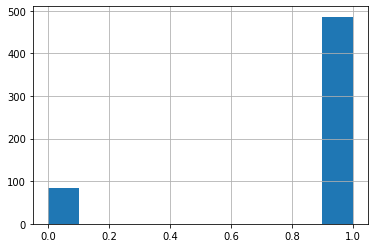

In [189]:
percent_matched = df2['cluster_matched_diagnosis'].sum() / len(df2['cluster_matched_diagnosis'])
print(f'percent where the clustering matched the diagnosis: {percent_matched*100:.2f}%')
print()

ax = df2['cluster_matched_diagnosis'].astype(int).hist();

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [194]:
df_pca_kmeans = df.drop(['Unnamed: 32', 'diagnosis'], axis=1).set_index('id')
df_pca_kmeans

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
id                                   ...                                         
842302          17.99         10.38  ...          0.4601                  0.11890
842517          20.57         17.77  ...          0.2750                  0.08902
84300903        19.69         21.25  ...          0.3613                  0.08758
84348301        11.42         20.38  ...          0.6638                  0.17300
84358402        20.29         14.34  ...          0.2364                  0.07678
...               ...           ...  ...             ...                      ...
926424          21.56         22.39  ...          0.2060                  0.07115
926682          20.13         28.25  ...          0.2572                  0.06637
926954          16.60         28.08  ...          0.2218                  0.07820
927241          20.60         29.33  ...          0.4087                  0.12400
92751            7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]

In [206]:
df_pca_kmeans.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

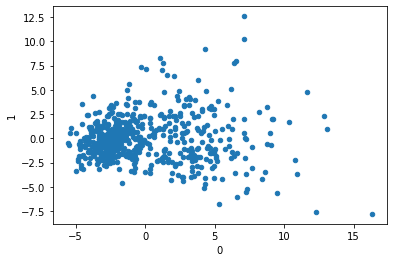

In [201]:
scaler = StandardScaler()
Z = scaler.fit_transform(df_pca_kmeans)

pca = PCA(2)
pca.fit(Z)
B = pca.transform(Z)

df_pca_1_2 = pd.DataFrame(B)
df_pca_1_2.plot.scatter(0, 1)
plt.show()

In [0]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    plt.grid(True)

In [0]:
pca2 = PCA(15)
pca2.fit(Z)
B2 = pca2.transform(Z)

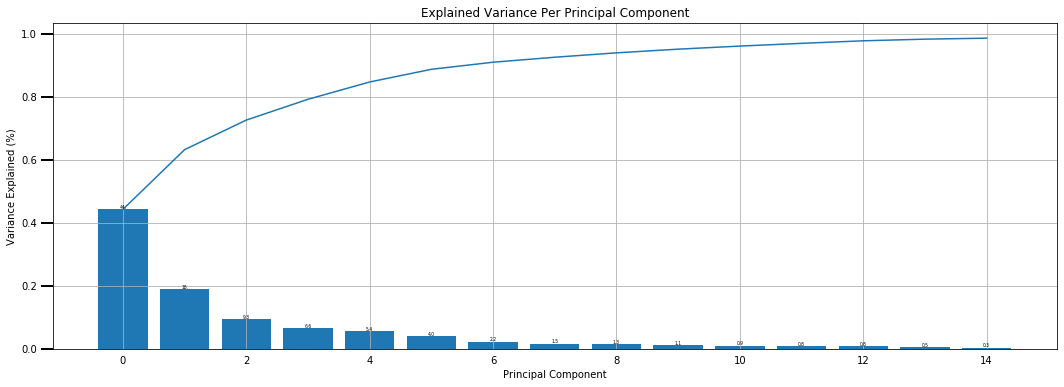

In [205]:
scree_plot(pca2)

so we pick pca(6). because it hits around the 90% mark

In [207]:
pca_final = PCA(6)
pca_final.fit(Z)

df_pca_data = pd.DataFrame(pca_final.transform(Z))
df_pca_data

0          1         2         3         4         5
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495
..         ...        ...       ...       ...       ...       ...
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567937
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837

[569 rows x 6 columns]

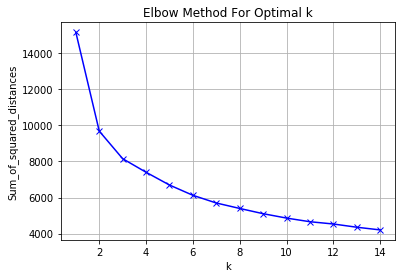

In [208]:
elbow_plot(df_pca_data)

so K = 2

In [0]:
km_new = KMeans(2)
km_new.fit(df_pca_data)

df_pca_data['cluster'] = km_new.labels_

In [0]:
df_pca_data['diagnosis'] = df['diagnosis']

In [213]:
df_pca_data

0          1         2  ...         5  cluster  diagnosis
0     9.192837   1.948583 -1.123166  ...  1.411424        0          M
1     2.387802  -3.768172 -0.529293  ...  0.028656        0          M
2     5.733896  -1.075174 -0.551748  ...  0.541452        0          M
3     7.122953  10.275589 -3.232790  ...  3.053422        0          M
4     3.935302  -1.948072  1.389767  ... -1.226495        0          M
..         ...        ...       ...  ...       ...      ...        ...
564   6.439315  -3.576817  2.459487  ... -2.375193        0          M
565   3.793382  -3.584048  2.088476  ... -0.246710        0          M
566   1.256179  -1.902297  0.562731  ... -0.534447        0          M
567  10.374794   1.672010 -1.877029  ...  0.567937        0          M
568  -5.475243  -0.670637  1.490443  ...  1.617837        1          B

[569 rows x 8 columns]

In [215]:
df_pca_kmeans_predictions = df_pca_data[['diagnosis', 'cluster']]
pd.crosstab(df_pca_kmeans_predictions['diagnosis'], df_pca_kmeans_predictions['cluster'])

cluster      0    1
diagnosis          
B           14  343
M          175   37

M = cluster 0

B = cluster 1

vs my previous k-means only attempt

In [221]:
pd.crosstab(df2['diagnosis'], df2['cluster_kmeans_df'])

cluster_kmeans_df    0    1
diagnosis                  
B                  356    1
M                   82  130

looks like it did worse

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project